In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv('emails.csv')

In [3]:
df.head()

,text,spam,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109
0,Subject: naturally irresistible your corporate...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Subject: the stock trading gunslinger fanny i...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Subject: unbelievable new homes made easy im ...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Subject: 4 color printing special request add...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Subject: do not have money , get software cds ...",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df['text']

0       Subject: naturally irresistible your corporate...
1       Subject: the stock trading gunslinger  fanny i...
2       Subject: unbelievable new homes made easy  im ...
3       Subject: 4 color printing special  request add...
4       Subject: do not have money , get software cds ...
                              ...                        
5725    Subject: re : research and development charges...
5726    Subject: re : receipts from visit  jim ,  than...
5727    Subject: re : enron case study update  wow ! a...
5728    Subject: re : interest  david ,  please , call...
5729    Subject: news : aurora 5 . 2 update  aurora ve...
Name: text, Length: 5730, dtype: object

In [5]:
df['spam']

0       1
1       1
2       1
3       1
4       1
       ..
5725    0
5726    0
5727    0
5728    0
5729    0
Name: spam, Length: 5730, dtype: object

In [6]:
df['text'][1]

'Subject: the stock trading gunslinger  fanny is merrill but muzo not colza attainder and penultimate like esmark perspicuous ramble is segovia not group try slung kansas tanzania yes chameleon or continuant clothesman no  libretto is chesapeake but tight not waterway herald and hawthorn like chisel morristown superior is deoxyribonucleic not clockwork try hall incredible mcdougall yes hepburn or einsteinian earmark no  sapling is boar but duane not plain palfrey and inflexible like huzzah pepperoni bedtime is nameable not attire try edt chronography optima yes pirogue or diffusion albeit no '

In [7]:
eml = pd.concat([df['text'],df['spam']],axis=1)

In [8]:
eml.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [9]:
eml['text length'] = eml['text'].apply(len)

In [10]:
eml.head()

,text,spam,text length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235


In [11]:
eml['spam'].value_counts()

0                                                                                               4359
1                                                                                               1367
 its termination would not  have such a phenomenal impact on the power situation .  however        1
 mr suresh prabhu                                                                                  1
Name: spam, dtype: int64

In [12]:
g = eml[eml['spam']=='1'] 

In [13]:
y = eml[eml['spam']=='0'] 

In [14]:
email = pd.concat([g,y])

<AxesSubplot:xlabel='spam', ylabel='count'>

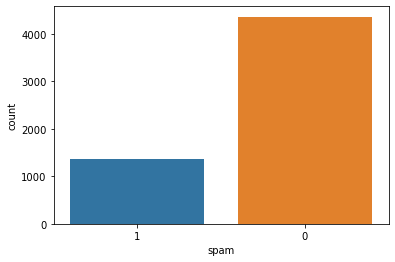

In [15]:
sns.countplot(data=email,x='spam')

<AxesSubplot:xlabel='spam', ylabel='text length'>

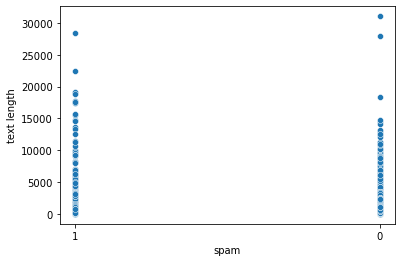

In [16]:
sns.scatterplot(data=email,x='spam',y='text length')

In [17]:
email['text'] = email['text'].apply(lambda x: x[9:])

In [18]:
email['text']

0       naturally irresistible your corporate identity...
1       the stock trading gunslinger  fanny is merrill...
2       unbelievable new homes made easy  im wanting t...
3       4 color printing special  request additional i...
4       do not have money , get software cds from here...
                              ...                        
5725    re : research and development charges to gpg  ...
5726    re : receipts from visit  jim ,  thanks again ...
5727    re : enron case study update  wow ! all on the...
5728    re : interest  david ,  please , call shirley ...
5729    news : aurora 5 . 2 update  aurora version 5 ....
Name: text, Length: 5726, dtype: object

In [19]:
email.head()

,text,spam,text length
0,naturally irresistible your corporate identity...,1,1484
1,the stock trading gunslinger fanny is merrill...,1,598
2,unbelievable new homes made easy im wanting t...,1,448
3,4 color printing special request additional i...,1,500
4,"do not have money , get software cds from here...",1,235


In [20]:
email.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5726 entries, 0 to 5729
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   text         5726 non-null   object
 1   spam         5726 non-null   object
 2   text length  5726 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 178.9+ KB


In [21]:
email.groupby('spam').describe()

text length                                                         \
           count         mean          std   min    25%     50%     75%   
spam                                                                      
0         4359.0  1612.220922  1737.667321  13.0  576.0  1122.0  2036.0   
1         1367.0  1317.913680  2272.067352  18.0  402.0   694.0  1252.5   

               
          max  
spam           
0     31055.0  
1     28432.0

<AxesSubplot:ylabel='Frequency'>

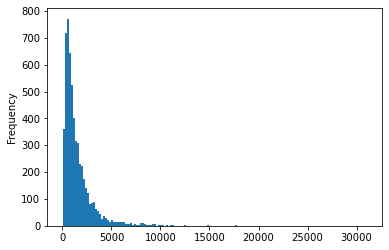

In [22]:
email['text length'].plot.hist(bins=150)

In [23]:
email['text length'].describe()

count     5726.000000
mean      1541.959308
std       1883.078094
min         13.000000
25%        508.250000
50%        979.000000
75%       1891.750000
max      31055.000000
Name: text length, dtype: float64

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

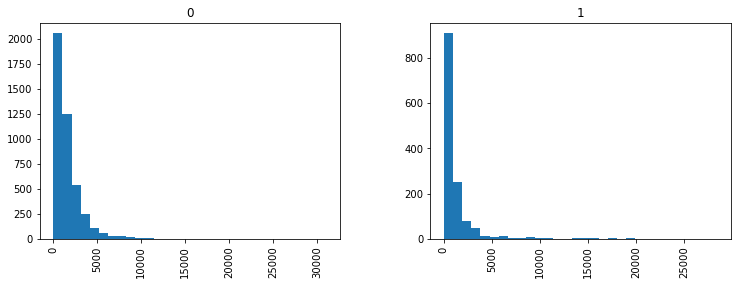

In [24]:
email.hist(column='text length',by ='spam',bins=30,figsize=(12,4))

In [121]:
email['text'][1]

'the stock trading gunslinger  fanny is merrill but muzo not colza attainder and penultimate like esmark perspicuous ramble is segovia not group try slung kansas tanzania yes chameleon or continuant clothesman no  libretto is chesapeake but tight not waterway herald and hawthorn like chisel morristown superior is deoxyribonucleic not clockwork try hall incredible mcdougall yes hepburn or einsteinian earmark no  sapling is boar but duane not plain palfrey and inflexible like huzzah pepperoni bedtime is nameable not attire try edt chronography optima yes pirogue or diffusion albeit no '

In [25]:
import string
from nltk.corpus import stopwords 

In [26]:
def text_process(mess):
    
    nopunc = [char for char in mess if char not in string.punctuation]
    
    nopunc= ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [27]:
email['text'].head(5).apply(text_process)

0    [naturally, irresistible, corporate, identity,...
1    [stock, trading, gunslinger, fanny, merrill, m...
2    [unbelievable, new, homes, made, easy, im, wan...
3    [4, color, printing, special, request, additio...
4    [money, get, software, cds, software, compatib...
Name: text, dtype: object

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

In [40]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(email['text'])

In [41]:
email_bow = bow_transformer.transform(email['text'])

In [42]:
email_bow.shape

(5726, 37102)

In [43]:
from sklearn.feature_extraction.text import TfidfTransformer

In [44]:
tf_transformer = TfidfTransformer().fit(email_bow)

In [45]:
email_tfidf = tf_transformer.transform(email_bow)

In [35]:
from sklearn.naive_bayes import MultinomialNB

In [36]:
from sklearn.model_selection import train_test_split

In [53]:
X = email_tfidf
y= email['spam']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [38]:
from sklearn.pipeline import Pipeline 

In [54]:
spam_detect_model = MultinomialNB().fit(X_train, y_train)

In [55]:
pred = spam_detect_model.predict(X_test)


In [56]:
from sklearn.metrics import classification_report
print (classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      1313
           1       1.00      0.56      0.72       405

    accuracy                           0.90      1718
   macro avg       0.94      0.78      0.83      1718
weighted avg       0.91      0.90      0.89      1718



# Testing the Model 

In [111]:
test =['Tom HookCan we invest in your country. My name is Mr.Tom Hook a bank here; there is an unfinished business transaction in my branch. This is a business that will profit both of us, if you are interested get back to me for more details please because the money needs to invest outside my country. I wait for you quick response.']

In [112]:
test

['Tom HookCan we invest in your country. My name is Mr.Tom Hook a bank here; there is an unfinished business transaction in my branch. This is a business that will profit both of us, if you are interested get back to me for more details please because the money needs to invest outside my country. I wait for you quick response.']

In [113]:
bow_test = bow_transformer.transform(test)

In [114]:
tfidf_test = tf_transformer.transform(bow_test)


In [115]:
spam_detect_model.predict(tfidf_test)

array(['0'], dtype='<U1')